1. **Feature Exploration, Engineering and Cleaning**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)

**Reading** train dataset (891 records) and test dataset(418 records).
**Combining** both datasets to fill the missing values to be more accurate.

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
combined = pd.concat([train,test],axis=0,ignore_index=True)
combined.shape

(1309, 12)

**Observation** - First go through the combined dataset
* Fare
> 1. you will observe that different people has same ticket number and same fare.
> 1. so we have to average the value of Fare for each individual.
> 1. but first, we have to make sure Fare value does not have any null values.
* Cabin
> 1. you will observe that missing Cabin values can be assigned from the same ticket number.

In [3]:
combined.sort_values(['Fare','PassengerId'], ascending=[0,1]).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950


* Counting null in each colum from combined dataset

In [4]:
combined.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

**Fare Cleaning** - Fill missing **Fare** value by taking median of Fare for respective Pclass.  As Fare is proportional to Pclass.
> Mean > Median, i.e. positively skewed data

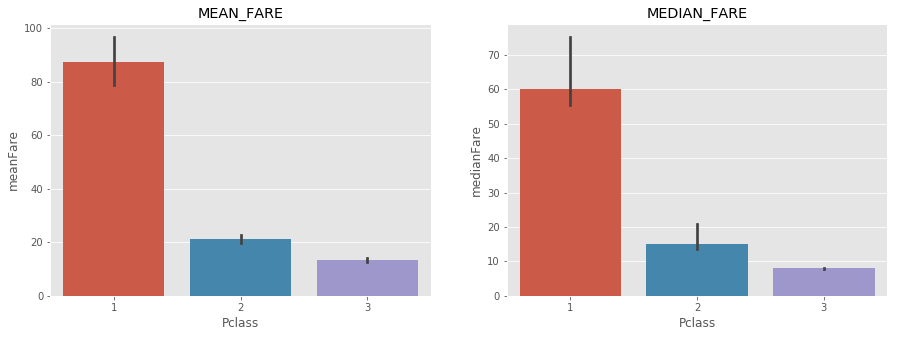

In [5]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
Mean=sns.barplot(x='Pclass',y='Fare',data=combined,estimator=np.mean,ax=ax[0]).set(ylabel='meanFare',title='MEAN_FARE')
Median=sns.barplot(x='Pclass',y='Fare',data=combined,estimator=np.median,ax=ax[1]).set(ylabel='medianFare',title='MEDIAN_FARE')

combined['Fare'] = combined['Fare'].groupby(combined['Pclass']).apply(lambda x: x.fillna(x.median()))

**Fare_per_person** -
> * Creating **Fare_per_person** feature representing the fare per person i.e. splitting the total fare in a single ticket.

In [6]:
combined['Fare_per_person'] = combined['Fare'].groupby(combined['Ticket']).transform(lambda x: x / x.count())
combined.sort_values(['Fare','PassengerId'], ascending=[0,1]).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_per_person
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,128.082300
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,128.082300
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,128.082300
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,128.082300
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,43.833333


**Ticket_cnt** -
> * Counting the number of people booked from a single ticket. (Group of people can be a family or friends)
> * Below barplot represents the survival probability of person corresponding to his/hers Ticket_cnt.

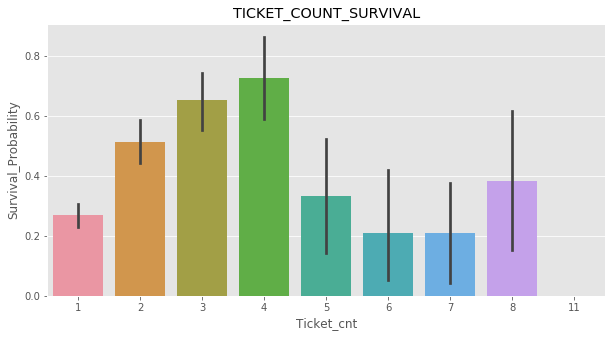

In [7]:
combined['Ticket_cnt'] = combined['Ticket'].groupby(combined['Ticket']).transform(lambda x: x.count())
fig, ax = plt.subplots(figsize=(10,5))
Cabin_plot=sns.barplot(x='Ticket_cnt',y='Survived',data=combined).set(ylabel='Survival_Probability',title='TICKET_COUNT_SURVIVAL')

**Cabin Cleaning** -  Assigning the missing **Cabin** values with repect to the Ticket number. 
> * We are interested in the Cabin class instead of Cabin number. 
> * And also unknown Cabin is represented by 'U'.

In [8]:
combined['Cabin'] = combined['Cabin'].groupby(combined['Ticket']).apply(lambda x: x.fillna(x.astype(str).str[0].mode()[0])).apply(lambda x: x[0]).apply(lambda x: 'U' if(x=='n') else x)
combined.sort_values(['Fare','PassengerId'], ascending=[0,1]).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_per_person,Ticket_cnt
258,35.0,B,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,128.082300,4
679,36.0,B,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,128.082300,4
737,35.0,B,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,128.082300,4
1234,58.0,B,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,128.082300,4
27,19.0,C,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,43.833333,6


Below barplot represents the survival probability of person corresponding to his/hers Cabin.

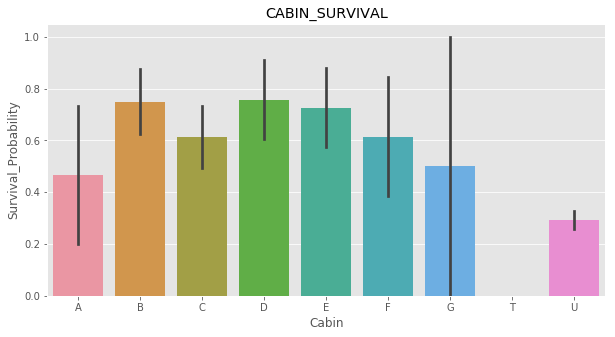

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
Cabin_plot=sns.barplot(x='Cabin',y='Survived',data=combined,order='ABCDEFGTU').set(ylabel='Survival_Probability',title='CABIN_SURVIVAL')

**Cabin_survived** - Grouping above Cabin categories
> * having high survival percentage (i.e. B,C,D,E,F) as 1 
> * having low survival percentage (i.e. A,G,T,U) as 0


In [10]:
combined['Cabin_survived'] = combined['Cabin'].apply(lambda x: 1 if(x in ['B','C','D','E','F']) else 0)

**Embarked Cleaning** - Fill missing **Embarked** values by taking mode of Embarked. 
> * As it is most probable that these people might have got onboard as the majority of people did.


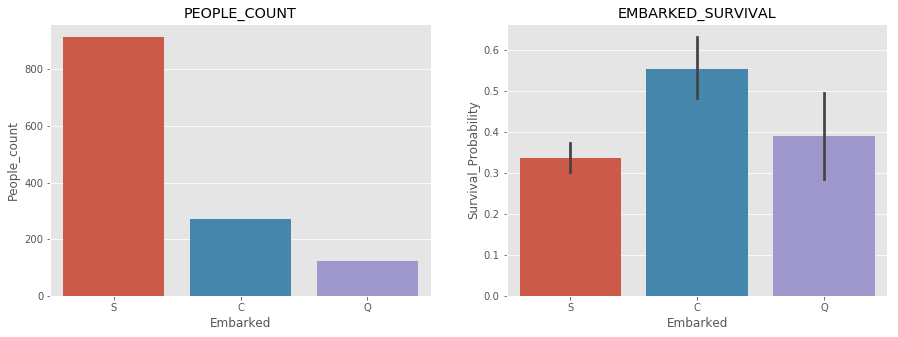

In [11]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
People_count=sns.countplot(x='Embarked',data=combined,ax=ax[0]).set(ylabel='People_count',title='PEOPLE_COUNT')
Embarked_survival=sns.barplot(x='Embarked',y='Survived',data=combined,ax=ax[1]).set(ylabel='Survival_Probability',title='EMBARKED_SURVIVAL')

combined['Embarked'].fillna(combined['Embarked'].mode()[0],inplace=True)

**Title** -
> **What's in a name?** -  William Shakespeare.
> * We are interested in the **Title** of the Name which should correspond to its appropriate  Age and Sex.
> * But we will consider the length of name, as some names are quite long and have high survival rate. (I know it doesn't make sense, but some females have name in brackets maybe it is before marriage)

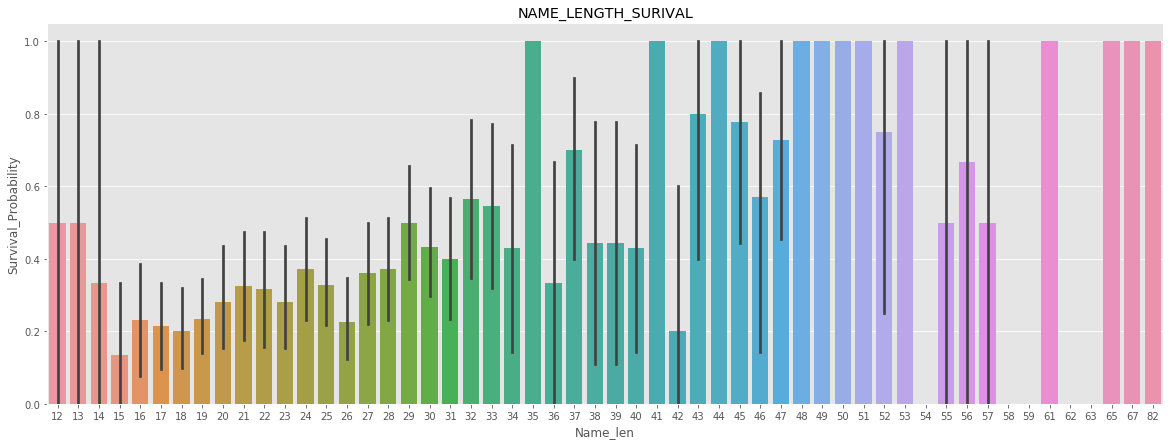

In [12]:
combined['Name_len'] = combined['Name'].apply(lambda x: len(x)).astype(int)
fig, ax = plt.subplots(figsize=(20,7))
Namelen_survival = sns.barplot(x='Name_len',y='Survived',data=combined).set(ylabel='Survival_Probability',title='NAME_LENGTH_SURIVAL')

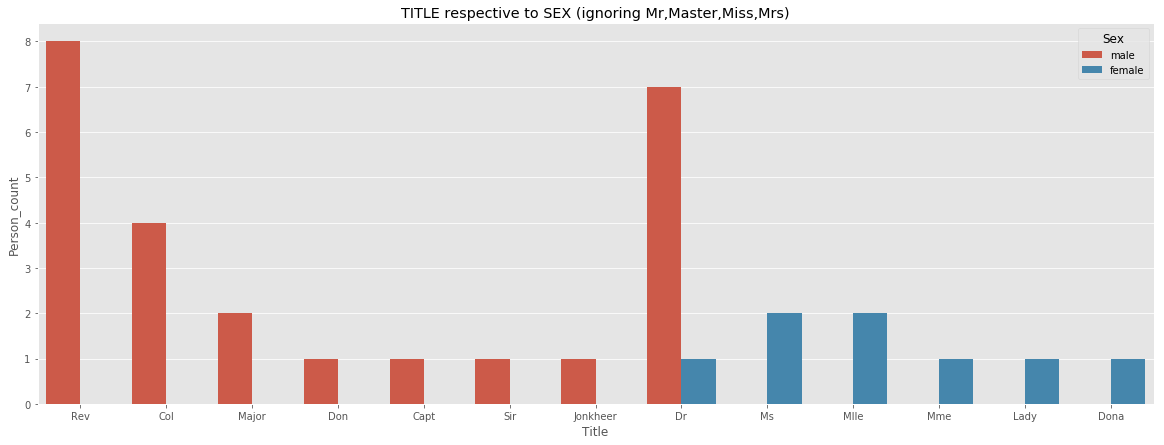

In [13]:
combined['Title'] = combined['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())
fig, ax = plt.subplots(figsize=(20,7))
order_list = ['Rev','Col','Major','Don','Capt','Sir','Jonkheer','Dr','Ms','Mlle','Mme','Lady','Dona']
Title_Sex=sns.countplot(x='Title',hue='Sex',data=combined,order=order_list).set(ylabel='Person_count',title='TITLE respective to SEX (ignoring Mr,Master,Miss,Mrs)')

1. Here we can observe that each Title is having distinct Sex, except **Dr.** which is having Sex male as a majority. So we are going to manually assign Female Dr to 'Mrs'.
1. And grouping the titles in 'Mr', 'Mrs', 'Miss', 'Master'.

In [14]:
combined.loc[(combined['Title']=='Dr') & (combined['Sex']=='female'),'Title'] = 'Mrs'
title_mapping = {'Capt':'Mr', 'Col':'Mr','Don':'Mr','Dona':'Mrs',
                 'Dr':'Mr','Jonkheer':'Mr','Lady':'Mrs','Major':'Mr',
                 'Master':'Master','Miss':'Miss','Mlle':'Miss','Mme':'Mrs',
                 'Mr':'Mr','Mrs':'Mrs','Ms':'Miss','Rev':'Mr','Sir':'Mr',
                 'the Countess':'Mrs'}
combined['Title'] = combined['Title'].map(title_mapping)

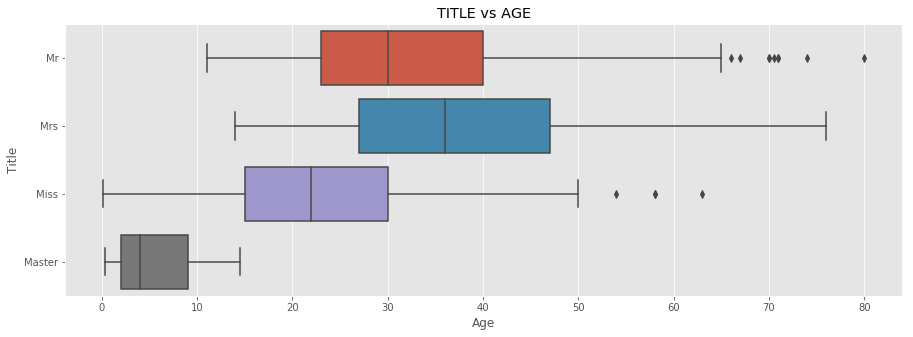

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
Title_Age = sns.boxplot(x='Age',y='Title',data=combined).set(title='TITLE vs AGE')

Assigning Miss age smaller than 14 to **Girl** Title.
> As you can see that there is no separate Title given for small girls but given for small boys as Master.
> * This is why the range and mean of Miss is large. 


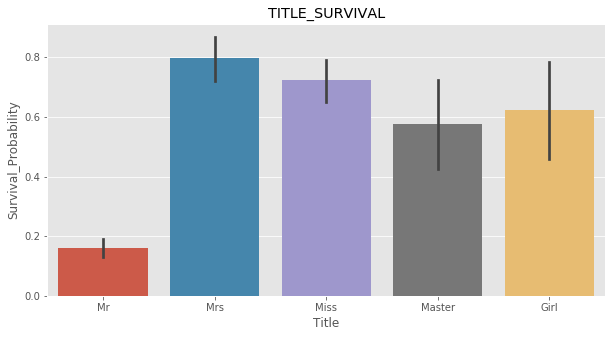

In [16]:
combined.loc[(combined['Title']=='Miss') & (combined['Age']<=14.0),'Title'] = 'Girl'
fig, ax = plt.subplots(figsize=(10,5))
Title_survival=sns.barplot(x='Title',y='Survived',data=combined).set(ylabel='Survival_Probability',title='TITLE_SURVIVAL')

**SibSp & Parch**
> Ploting the survival probability of SibSp & Parch**

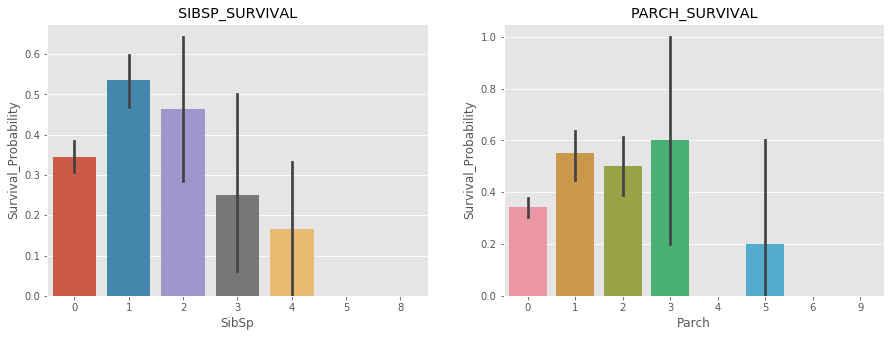

In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
SibSp_survival=sns.barplot(x='SibSp',y='Survived',data=combined,ax=ax[0]).set(ylabel='Survival_Probability',title='SIBSP_SURVIVAL')
Parch_survival=sns.barplot(x='Parch',y='Survived',data=combined,ax=ax[1]).set(ylabel='Survival_Probability',title='PARCH_SURVIVAL')

**Family**
> Creating **Family** feature which equals to the sum of SibSp and Parch i.e, the completly.

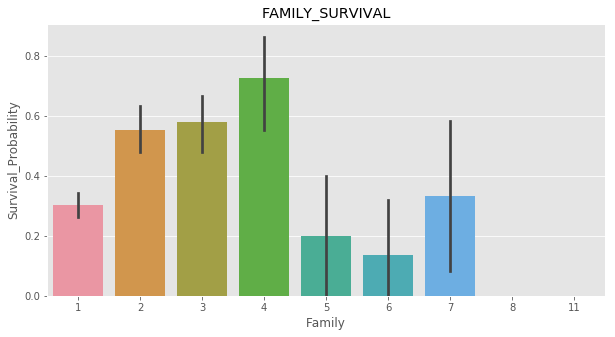

In [18]:
combined['Family'] = combined['SibSp'] + combined['Parch'] + 1
fig, ax = plt.subplots(figsize=(10,5))
Family_survival=sns.barplot(x='Family',y='Survived',data=combined).set(ylabel='Survival_Probability',title='FAMILY_SURVIVAL')

**IsAlone**
> Crearting **IsAlone** feature representing the person is alone or accompanied with family.

In [19]:
combined['IsAlone'] = combined['Family'].apply(lambda x: 1 if(x==1) else 0)

**Age Cleaning** - Fill missing **Age** values by taking the median  Age of its corresponding Title,Pclass.

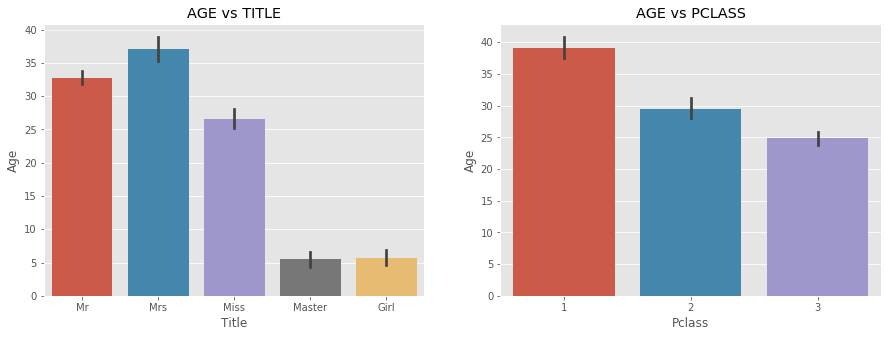

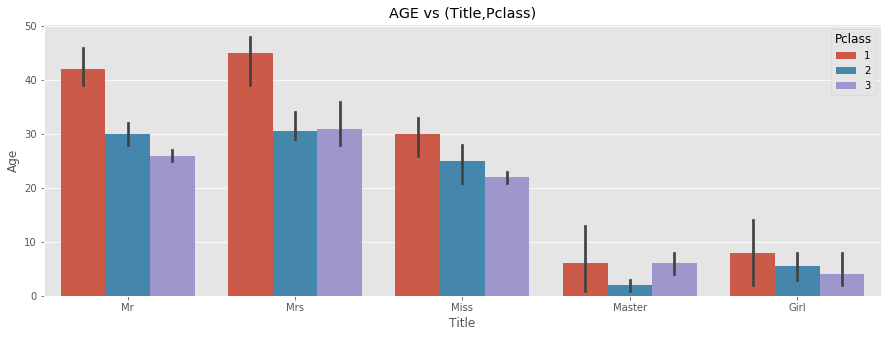

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
Title_Age=sns.barplot(x='Title',y='Age',data=combined,ax=ax[0]).set(ylabel='Age',title='AGE vs TITLE')
Pclass_Age=sns.barplot(x='Pclass',y='Age',data=combined,ax=ax[1]).set(ylabel='Age',title='AGE vs PCLASS')
fig,ax=plt.subplots(figsize=(15,5))
Both_Age=sns.barplot(x='Title',y='Age',hue='Pclass',data=combined,estimator=np.median).set(ylabel='Age',title='AGE vs (Title,Pclass)')

In [21]:
combined['Age'] = combined.groupby(['Title','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

**Sex mapping**

In [22]:
sex_mapping = {'male':1,'female':0}
combined['Sex'] = combined['Sex'].map(sex_mapping)

**Age_grp** & **Fare_grp**
> Grouping the Age & Fare_per_person in 5 bands (**Age_grp** & **Fare_grp**). Creating them in categorical variable instead of continuous variable.
> * And splitting Fare in quintiles.

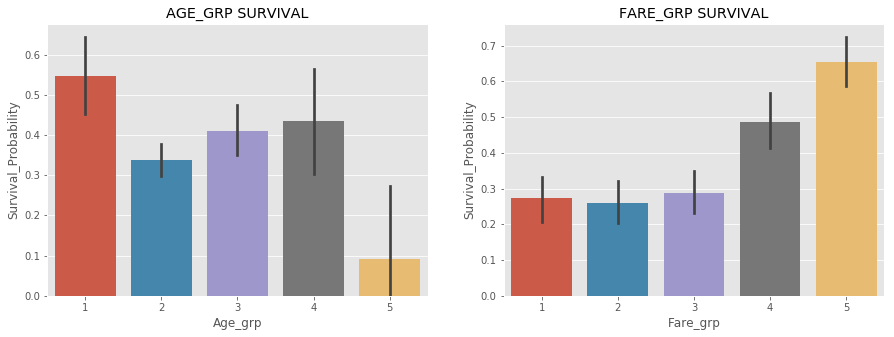

In [23]:
combined['Age_grp'] = pd.cut(combined['Age'],5,labels=[1,2,3,4,5])
combined['Fare_grp'] = pd.qcut(combined['Fare_per_person'],5,labels=[1,2,3,4,5])
fig,ax=plt.subplots(1,2,figsize=(15,5))
Age_grp=sns.barplot(x='Age_grp',y='Survived',data=combined,ax=ax[0]).set(ylabel='Survival_Probability',title='AGE_GRP SURVIVAL')
Fare_grp=sns.barplot(x='Fare_grp',y='Survived',data=combined,ax=ax[1]).set(ylabel='Survival_Probability',title='FARE_GRP SURVIVAL')

1. We are not going use **Ticket & Name** as it has object datatype. And also not using **PassengerId** as it seems as a sequence number.
1. Also creating dummy columns to convert categorical varibles into numerical variables.
1. Try various columns combinations in dummy features which you want to use in modelling.

In [24]:
dummy_features=['Age','Age_grp','Sex','Fare_grp','Fare_per_person','Ticket_cnt',
                'Cabin_survived','Survived','Embarked','Pclass','Title',
                'Parch','SibSp','Family','IsAlone']
combined_wo_dummies = combined[dummy_features]
combined = pd.get_dummies(combined[dummy_features])
train_features=combined.iloc[:891,:]
train_labels=train_features.pop('Survived').astype(int)
test_features=combined.iloc[891:,:].drop('Survived',axis=1)

**3. Basic Modelling**
> We choose 8 models and use 5-fold cross validationsto evaluate these models.
* k-Nearest Neighbors
* Logistic Regression
* Naive Bayes classifier
* Support Vector Machine
* Decision Tree
* Random Forest
* Gradient Boosting Decision Tree
* Adaboost


In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [27]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),
        RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]
names=['KNN','LR','NB','SVM','Tree','RF','GB','Ada']
for name,model in zip(names,models):
    score=cross_val_score(model,train_features,train_labels,cv=5)
    print('{} :: {} , {}'.format(name,score.mean(),score))

KNN :: 0.7330082733199351 , [ 0.70391061  0.69273743  0.71910112  0.7752809   0.7740113 ]
LR :: 0.8227339157177476 , [ 0.82681564  0.81005587  0.80337079  0.80337079  0.8700565 ]
NB :: 0.7790579217508273 , [ 0.73184358  0.76536313  0.79213483  0.74719101  0.85875706]
SVM :: 0.7935700107845024 , [ 0.79329609  0.74860335  0.79775281  0.80898876  0.81920904]
Tree :: 0.7890439597033393 , [ 0.78212291  0.76536313  0.79213483  0.80898876  0.79661017]
RF :: 0.8025211124102636 , [ 0.77094972  0.80446927  0.83146067  0.78651685  0.81920904]
GB :: 0.8305612090558613 , [ 0.83240223  0.82122905  0.84269663  0.80337079  0.85310734]
Ada :: 0.8159540419187691 , [ 0.82122905  0.79888268  0.83146067  0.80898876  0.81920904]


As some algorithms such as KNN & SVM are sensitive to the **scaling** of the data, here we also apply standard-scaling to the data. 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_features_scaled=scaler.fit(train_features).transform(train_features)
test_features_scaled=scaler.fit(test_features).transform(test_features)
for name,model in zip(names,models):
    score=cross_val_score(model,train_features_scaled,train_labels,cv=5)
    print('{} :: {} , {}'.format(name,score.mean(),score))

KNN :: 0.8171597358240179 , [ 0.79329609  0.79329609  0.8258427   0.81460674  0.85875706]
LR :: 0.8249684816619128 , [ 0.83240223  0.81005587  0.80898876  0.80898876  0.86440678]
NB :: 0.7296197195036364 , [ 0.73184358  0.76536313  0.79213483  0.5         0.85875706]
SVM :: 0.8350684289274332 , [ 0.83798883  0.82681564  0.8258427   0.80898876  0.87570621]
Tree :: 0.7912658296530909 , [ 0.77653631  0.77653631  0.80337079  0.82022472  0.77966102]
RF :: 0.802483449991081 , [ 0.81564246  0.79329609  0.8258427   0.75842697  0.81920904]
GB :: 0.8305612090558613 , [ 0.83240223  0.82122905  0.84269663  0.80337079  0.85310734]
Ada :: 0.817077637424387 , [ 0.82122905  0.79888268  0.83146067  0.81460674  0.81920904]


* We can see improvement in the scores of KNN & SVM. 
*  And also **GradientBoostingClassifier** having higher score compared to other models.
* Ignoring naive bayes GaussianNB resulting least score.


As seen from above results, GradientBoostingClassifier shows high score. Let us observe the **feature importance** of training dataset.

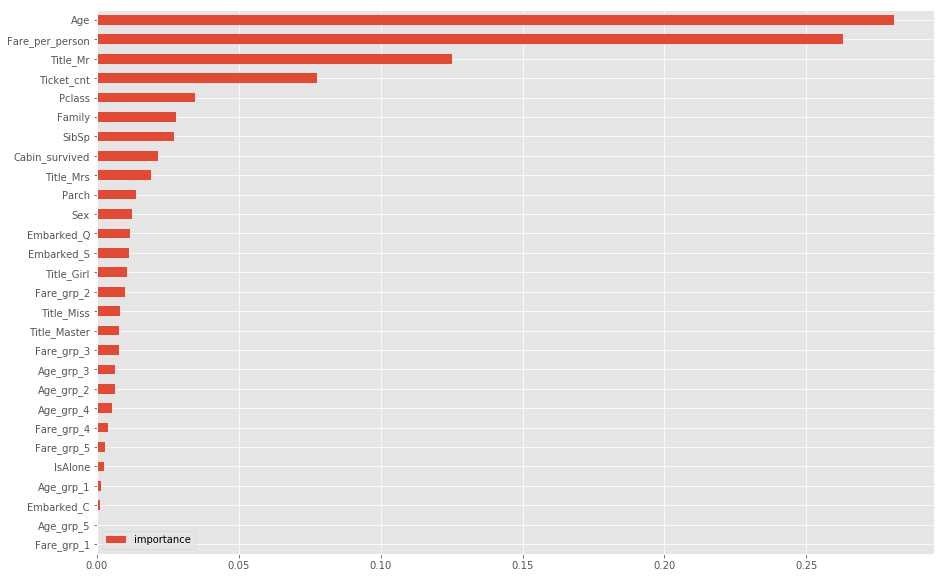

In [29]:
GB_imp=GradientBoostingClassifier()
GB_imp.fit(train_features,train_labels)
features_imp = pd.DataFrame({'importance':GB_imp.feature_importances_},index=train_features.columns).sort_values('importance',ascending=True)
features_imp_plot = features_imp.plot(kind='barh',figsize=(15,10))

* Now to increase the overall accuracy, we should minimize the misclassified observations by finding the pattern between them and generate the new feature. But make sure that your are not overfitting the model.

In [30]:
from sklearn.metrics import roc_auc_score
misclassified=[]
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=42)
for i,(train_index,test_index) in enumerate(kf.split(train_features)):
    kf_x_train = train_features.loc[train_index]
    kf_y_train = train_labels[train_index]
    kf_x_test = train_features.loc[test_index]
    pred = GB_imp.fit(kf_x_train,kf_y_train).predict(kf_x_test)
    misclassified.append(train_labels[test_index][pred != train_labels[test_index]].index)
    print('roc_auc_score ',i,' : ',roc_auc_score(pred,train_labels[test_index]))
misclassified_index = np.concatenate(misclassified)
misclassified_index

roc_auc_score  0  :  0.823376623377
roc_auc_score  1  :  0.788208168643
roc_auc_score  2  :  0.751390433815
roc_auc_score  3  :  0.855369807497
roc_auc_score  4  :  0.850628930818
roc_auc_score  5  :  0.810889929742
roc_auc_score  6  :  0.801948051948
roc_auc_score  7  :  0.792114695341
roc_auc_score  8  :  0.858225108225
roc_auc_score  9  :  0.830158730159


array([  2,  14,  17,  18,  21,  23,  25,  30,  36,  40,  41,  49,  55,
        68,  79,  81,  97, 100, 107, 109, 111, 114, 118, 127, 137, 140,
       146, 169, 177, 186, 187, 199, 204, 205, 207, 209, 220, 224, 226,
       233, 235, 240, 245, 246, 248, 251, 254, 261, 264, 267, 271, 273,
       283, 286, 288, 297, 301, 312, 328, 336, 338, 339, 347, 357, 373,
       376, 390, 391, 396, 400, 414, 415, 419, 423, 429, 444, 447, 449,
       452, 453, 455, 460, 483, 484, 498, 501, 502, 505, 507, 509, 510,
       534, 536, 543, 547, 550, 553, 559, 564, 567, 569, 570, 578, 579,
       587, 593, 599, 607, 610, 622, 630, 643, 645, 647, 654, 657, 660,
       664, 673, 677, 680, 681, 690, 692, 698, 702, 711, 712, 729, 740,
       741, 744, 748, 762, 767, 772, 782, 797, 799, 804, 807, 816, 821,
       826, 828, 830, 839, 841, 852, 854, 857, 867, 888])

In [31]:
len(misclassified_index)

153

In [32]:
misclassified_df = combined_wo_dummies.loc[misclassified_index]
misclassified_df.head()

,Age,Age_grp,Sex,Fare_grp,Fare_per_person,Ticket_cnt,Cabin_survived,Survived,Embarked,Pclass,Title,Parch,SibSp,Family,IsAlone
2,26.0,2,0,3,7.9250,1,0,1.0,S,3,Miss,0,0,1,1
14,14.0,1,0,2,7.8542,1,0,0.0,S,3,Girl,0,0,1,1
17,30.0,2,1,4,13.0000,1,0,1.0,S,2,Mr,0,0,1,1
18,31.0,2,0,3,9.0000,2,0,0.0,S,3,Mrs,0,1,2,0
21,34.0,3,1,4,13.0000,1,1,1.0,S,2,Mr,0,0,1,1


* From the feature importance diagram, we can see that
> * **Fare_per_person** & **Age** are important, because as they have float datatype we cannot use them for groupby.
> * **Title**, **Pclass** & **Family** are next important feature which can be used for groupby.
> *  As Family have high range of numbers compared to **IsAlone** which is derived from Family itself. 
* We are interested in count  and also the mean of Survived 
> * Count - number of occurance of misclassified group.
> * Mean - which will give us idea about (mean>0.5 : Alive) and (mean<0.5 : Dead)

In [33]:
misclassified_df.groupby(['Title','Pclass','Family'])['Survived'].agg(['mean','count'])

mean  count
Title  Pclass Family                 
Girl   1      4       0.000000      1
       3      1       0.000000      1
              2       0.000000      1
              3       0.000000      2
              7       1.000000      1
Master 3      7       1.000000      1
Miss   1      1       0.000000      1
       2      1       0.000000      2
       3      1       0.210526     19
              2       0.200000      5
              3       0.000000      1
              4       0.000000      1
              7       1.000000      1
Mr     1      1       0.652174     23
              2       0.533333     15
              3       0.666667      6
              4       1.000000      1
       2      1       0.875000      8
              2       1.000000      1
       3      1       0.937500     32
              2       1.000000      2
              3       1.000000      2
Mrs    1      4       0.000000      1
       2      1       0.000000      1
              2       0.000000      2
              3       0.000000      1
       3      1       0.666667      3
              2       0.500000      8
              3       0.142857      7
              5       0.000000      1
              7       0.500000      2

We can see that **Mr** of all Pclass (mean>0.5) have high actual probability of Survival, whereas **Miss** & **Mrs** of  all Pclass (mean<0.5) have low actual probability of Survival ,compared to what we have predicted.
* If we try to minimize above misclassified, it may lead to overfitting the model.
* Consider this as a bais-variance tradeoff.

**3. Hyperparameter Tuning**

In [34]:
from sklearn.model_selection import GridSearchCV

train_features=combined.iloc[:891,:]
train_labels=train_features.pop('Survived').astype(int)
test_features=combined.iloc[891:,:].drop('Survived',axis=1)

In [35]:
HP_tuning = False

k-Nearest Neighbors

In [36]:
if(HP_tuning):
    parameter_grid = {'n_neighbors':[4,6,8,10,12], 'algorithm':['auto','ball_tree','kd_tree','brute']}
    KNN = GridSearchCV(KNeighborsClassifier(),parameter_grid,cv=5)
    KNN.fit(train_features_scaled,train_labels)
    print('parameter_grid1 : ',KNN.best_params_,KNN.best_score_)

Logistic Regression

In [37]:
if(HP_tuning):
    parameter_grid = {'C':[0.01,0.1,1,10]}
    LR = GridSearchCV(LogisticRegression(),parameter_grid,cv=5)
    LR.fit(train_features_scaled,train_labels)
    print('parameter_grid1 : ',LR.best_params_,LR.best_score_)

Support Vector Machine

In [38]:
if(HP_tuning):
    parameter_grid = {'C':[0.1,1,10],'gamma':['auto',0.01,0.1,1,10]}
    SVM = GridSearchCV(SVC(),parameter_grid,cv=5)
    SVM.fit(train_features_scaled,train_labels)
    print('parameter_grid1 : ',SVM.best_params_,SVM.best_score_)

Decision Tree

In [39]:
if(HP_tuning):
    parameter_grid = {'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3],'max_depth':[None,2,3,4]}
    DT = GridSearchCV(DecisionTreeClassifier(),parameter_grid,cv=5)
    DT.fit(train_features_scaled,train_labels)
    print('parameter_grid1 : ',DT.best_params_,DT.best_score_)

Random Forest

In [40]:
if(HP_tuning):
    parameter_grid = {'n_estimators':[100,110,120,130],'max_depth':[None,1,2,3]}
    RF = GridSearchCV(RandomForestClassifier(),parameter_grid,cv=5)
    RF.fit(train_features_scaled,train_labels)
    print('parameter_grid1 : ',RF.best_params_,RF.best_score_)
    parameter_grid = {'min_samples_split':[2,3,4],'min_samples_leaf':[2,3,4]}
    RF = GridSearchCV(RandomForestClassifier(n_estimators=100,max_depth=None),parameter_grid,cv=5)
    RF.fit(train_features_scaled,train_labels)
    print('parameter_grid2 : ',RF.best_params_,RF.best_score_)

Gradient Boosting Decision Tree

In [41]:
if(HP_tuning):
    parameter_grid = {'n_estimators':[110,120,130],'max_depth':[2,3,4]}
    GB = GridSearchCV(GradientBoostingClassifier(learning_rate=0.2),parameter_grid,cv=5)
    GB.fit(train_features_scaled,train_labels)
    print('parameter_grid1 : ',GB.best_params_,GB.best_score_)
    parameter_grid = {'min_samples_split':[60,65,70],'min_samples_leaf':[1,2,3]}
    GB = GridSearchCV(GradientBoostingClassifier(n_estimators=120,max_depth=3,learning_rate=0.2),parameter_grid,cv=5)
    GB.fit(train_features_scaled,train_labels)
    print('parameter_grid2 : ',GB.best_params_,GB.best_score_)

Adaboost

In [42]:
if(HP_tuning):
    parameter_grid ={'n_estimators':[110,120,130],'learning_rate':[0.01,0.1,1,10],'random_state':[None,42]}
    Ada = GridSearchCV(AdaBoostClassifier(),parameter_grid,cv=5)
    Ada.fit(train_features_scaled,train_labels)
    print('parameter_grid1 : ',Ada.best_params_,Ada.best_score_)

**4. Voting / Boosting models**

In [43]:
KNN_clf = KNeighborsClassifier(algorithm='auto', n_neighbors=6)
LR_clf = LogisticRegression(C=0.1)
SVM_clf = SVC(C=1,gamma='auto',probability=True)
Tree_clf = DecisionTreeClassifier(max_depth=4,min_samples_leaf=1,min_samples_split=4)
RF_clf = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_leaf=2,min_samples_split=3)
GB_clf = GradientBoostingClassifier(n_estimators=120,max_depth=3,min_samples_leaf=3,min_samples_split=65,learning_rate=0.2)
Ada_clf = AdaBoostClassifier(learning_rate=0.1,n_estimators=130,random_state=None)

model_list = [('KNN',KNN_clf),('LR',LR_clf),('SVM',SVM_clf),('Tree',Tree_clf),('RF',RF_clf),('GB',GB_clf),('Ada',Ada_clf)]
from sklearn.ensemble import VotingClassifier
voteh_clf = VotingClassifier(estimators=model_list,voting='hard')
votehw_clf = VotingClassifier(estimators=model_list,voting='hard',weights=[1,1,2,1,2,2,1])
votes_clf = VotingClassifier(estimators=model_list,voting='soft')
votesw_clf = VotingClassifier(estimators=model_list,voting='soft',weights=[1,1,2,1,2,2,1])

names = ['KNN','LR','SVM','Tree','RF','GB','Ada','voteh','votehw','votes','votesw']
models = [KNN_clf,LR_clf,SVM_clf,Tree_clf,RF_clf,GB_clf,Ada_clf,voteh_clf,votehw_clf,votes_clf,votesw_clf]

for name,model in zip(names,models):
    score=cross_val_score(model,train_features_scaled,train_labels,cv=5)
    print('{} :: {} , {}'.format(name,score.mean(),score))

KNN :: 0.824980752092268 , [ 0.80446927  0.80446927  0.83707865  0.83707865  0.84180791]
LR :: 0.8249874547261904 , [ 0.83240223  0.80446927  0.80898876  0.80337079  0.87570621]
SVM :: 0.8350684289274332 , [ 0.83798883  0.82681564  0.8258427   0.80898876  0.87570621]
Tree :: 0.8339572457068567 , [ 0.84916201  0.79329609  0.85393258  0.80898876  0.86440678]
RF :: 0.8294437487654209 , [ 0.82681564  0.81005587  0.85955056  0.80898876  0.84180791]
GB :: 0.8429082054779314 , [ 0.84916201  0.81564246  0.87640449  0.82022472  0.85310734]
Ada :: 0.8249433024551145 , [ 0.84357542  0.81564246  0.80898876  0.79775281  0.85875706]
voteh :: 0.8384076173129389 , [ 0.84916201  0.82681564  0.84269663  0.81460674  0.85875706]
votehw :: 0.8406421832571042 , [ 0.8603352   0.82122905  0.85393258  0.81460674  0.85310734]
votes :: 0.8372966468743916 , [ 0.84916201  0.82122905  0.84269663  0.80898876  0.86440678]
votesw :: 0.8395501858828345 , [ 0.8547486   0.81564246  0.84831461  0.80898876  0.8700565 ]


In [44]:
import numpy as np
n_train=train.shape[0]
n_test=test.shape[0]
NFOLDS = 10
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=NFOLDS,shuffle=True,random_state=0)

Out-of-Fold Predictions

In [45]:
def get_oof(clf,X_train,Y_train,X_test):
    oof_train=np.zeros((n_train,))
    oof_test_mean=np.zeros((n_test,))
    oof_test_single=np.empty((NFOLDS,n_test))
    for i, (train_index,test_index) in enumerate(kf.split(X_train,Y_train)):
        kf_X_train=X_train[train_index]
        kf_Y_train=Y_train[train_index]
        kf_X_test=X_train[test_index]
        
        clf.fit(kf_X_train,kf_Y_train)
        
        oof_train[test_index]=clf.predict(kf_X_test)
        oof_test_single[i,:]=clf.predict(X_test)
    oof_test_mean=oof_test_single.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test_mean.reshape(-1,1)

**5. Stacking models**

In [46]:
KNN_train,KNN_test= get_oof(KNN_clf, train_features_scaled,train_labels,test_features_scaled)
LR_train,LR_test= get_oof(LR_clf, train_features_scaled,train_labels,test_features_scaled)
SVM_train,SVM_test= get_oof(SVM_clf, train_features_scaled,train_labels,test_features_scaled)
Tree_train,Tree_test= get_oof(Tree_clf, train_features_scaled,train_labels,test_features_scaled)
RF_train,RF_test= get_oof(RF_clf, train_features_scaled,train_labels,test_features_scaled)
GB_train,GB_test= get_oof(GB_clf, train_features_scaled,train_labels,test_features_scaled)
Ada_train,Ada_test= get_oof(Ada_clf, train_features_scaled,train_labels,test_features_scaled)

X_train_stack = np.concatenate((KNN_train,LR_train,SVM_train,Tree_train,RF_train,Ada_train,GB_train),axis=1)         
X_test_stack = np.concatenate((KNN_test,LR_test,SVM_test,Tree_test,RF_test,Ada_test,GB_test),axis=1)

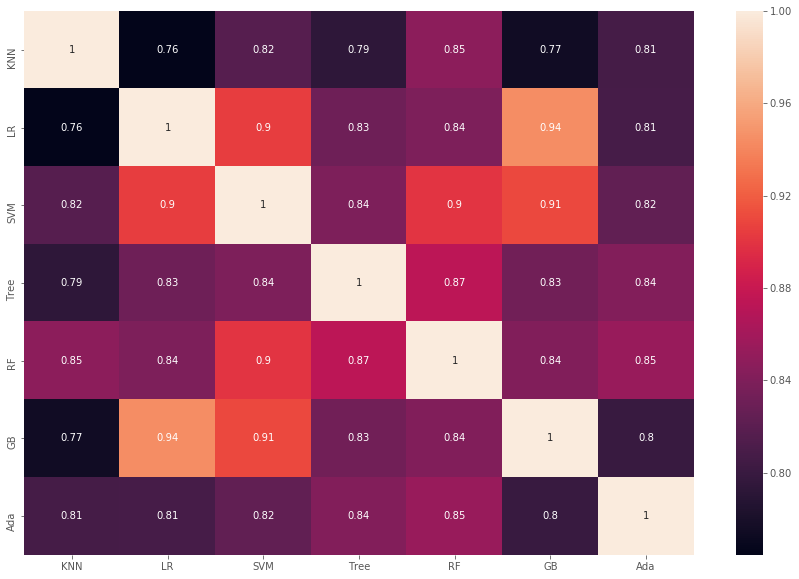

In [47]:
X_train_stack_df = pd.DataFrame(X_train_stack,columns=['KNN','LR','SVM','Tree','RF','GB','Ada'])
fig,ax=plt.subplots(figsize=(15,10))
Heatmap = sns.heatmap(X_train_stack_df.corr(),annot=True)

In [48]:
if(HP_tuning):
    from xgboost import XGBClassifier
    parameter_grid = {'n_estimators':[10,20,30],'max_depth':[1,2,3,4,5],'min_child_weight':[1,2,3]}
    XGB_clf = GridSearchCV(XGBClassifier(),parameter_grid,cv=5)
    XGB_clf.fit(X_train_stack,train_labels)
    print('parameter_grid1 : ',XGB_clf.best_params_,XGB_clf.best_score_)
    from xgboost import XGBClassifier
    parameter_grid = {'gamma':[0.01,0.1,0],'subsample':[0.1,0.5,1]}
    XGB_clf = GridSearchCV(XGBClassifier(n_estimators=20,max_depth=4,min_child_weight=2),parameter_grid,cv=5)
    XGB_clf.fit(X_train_stack,train_labels)
    print('parameter_grid2 : ',XGB_clf.best_params_,XGB_clf.best_score_)
    parameter_grid = {'learning_rate':[0.01,0.1,1,10]}
    XGB_clf = GridSearchCV(XGBClassifier(n_estimators=20,max_depth=4,min_child_weight=2,gamma=0.01,subsample=0.5),parameter_grid,cv=5)
    XGB_clf.fit(X_train_stack,train_labels)
    print('parameter_grid3 : ',XGB_clf.best_params_,XGB_clf.best_score_)

**6. Prediction**

In [49]:
from xgboost import XGBClassifier
XGB_clf = XGBClassifier(n_estimators=20,learning_rate=0.1,max_depth=4,min_child_weight=2,gamma=0.01,subsample=0.5)
XGB_clf.fit(X_train_stack,train_labels)
pred = XGB_clf.predict(X_test_stack)
test_labels = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':list(map(int,pred))})
test_labels.to_csv('Titanic_solution.csv',index=False)